In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
df = pd.read_csv('./data/bmi_500.csv')


,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [10]:
np.mean(df['Height']) #평균

np.float64(169.944)

In [11]:
np.var(df['Height']) #모분산 보정X

np.float64(267.612864)

In [12]:
np.var(df['Height'], ddof = 1) #모분산 베셀 보정

np.float64(268.1491623246493)

In [13]:
np.std(df['Height']) #표준편차

np.float64(16.35887722308594)

In [14]:
np.std(df['Height'], ddof = 1)

np.float64(16.375260679593755)

In [15]:
np.cov(df['Height'],df['Weight']) #공분산 행렬 [[h 분산, 공분산], [공분산, w 분산]]

array([[2.68149162e+02, 2.36472946e-01],
       [2.36472946e-01, 1.04863327e+03]])

In [17]:
np.cov(df['Height'], df['Weight'])[0,1]

np.float64(0.23647294589177809)

In [18]:
df['Height'].corr(df['Weight']) #pearson correlation

np.float64(0.0004459451283053407)

In [21]:
#회귀분석

x = df['Weight']
y = df['Height']
x = sm.add_constant(x)

result = sm.OLS(y,x).fit()

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 9.904e-05
Date:                Tue, 10 Feb 2026   Prob (F-statistic):              0.992
Time:                        11:13:51   Log-Likelihood:                -2106.9
No. Observations:                 500   AIC:                             4218.
Df Residuals:                     498   BIC:                             4226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.9201      2.511     67.661      0.000     164.986     174.854
Weight         0.0002      0.023      0.010      0.992      -0.044       0.045
==============================================================================
Omnibus:                      191.458   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.385
Skew:                          -0.122   Prob(JB):                     1.13e-06
Kurtosis:                       1.880   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result.params

const     169.920096
Weight      0.000226
dtype: float64

In [25]:
x

,const,Weight
0,1.0,96
1,1.0,87
2,1.0,110
3,1.0,104
4,1.0,61
...,...,...
495,1.0,153
496,1.0,121
497,1.0,136
498,1.0,95


In [26]:
df['estimation']= 0
for i in x.columns:
    df['estimation'] += x[i]*result.params[i]
df

,Gender,Height,Weight,Label,estimation
0,Male,174,96,Obesity,169.941745
1,Male,189,87,Normal,169.939715
2,Female,185,110,Obesity,169.944902
3,Female,195,104,Overweight,169.943549
4,Male,149,61,Overweight,169.933852
...,...,...,...,...,...
495,Female,150,153,Extreme Obesity,169.954599
496,Female,184,121,Obesity,169.947383
497,Female,141,136,Extreme Obesity,169.950765
498,Male,150,95,Extreme Obesity,169.941519


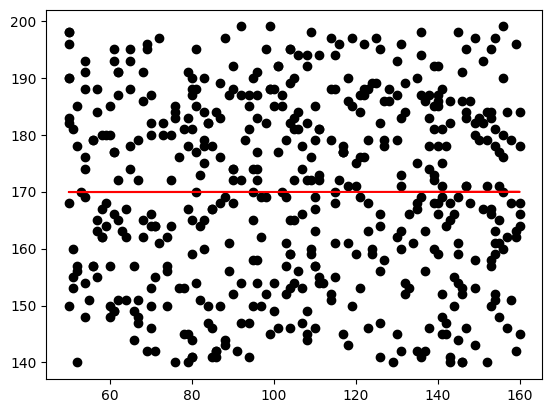

In [27]:
plt.scatter(df['Weight'],df['Height'],color = 'black')
plt.plot(df['Weight'], df['estimation'],color = 'red')
plt.show()

In [28]:
df['Label'].unique()

<StringArray>
['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
 'Extremely Weak']
Length: 6, dtype: str

In [29]:
code = {
"Extremely Weak" : 0,
"Weak" : 1,
"Normal" : 2,
"Overweight":3,
"Obesity":4,
"Extreme Obesity":5
}
df['coded_label'] = df['Label'].apply(lambda x: code[x])
df

,Gender,Height,Weight,Label,estimation,coded_label
0,Male,174,96,Obesity,169.941745,4
1,Male,189,87,Normal,169.939715,2
2,Female,185,110,Obesity,169.944902,4
3,Female,195,104,Overweight,169.943549,3
4,Male,149,61,Overweight,169.933852,3
...,...,...,...,...,...,...
495,Female,150,153,Extreme Obesity,169.954599,5
496,Female,184,121,Obesity,169.947383,4
497,Female,141,136,Extreme Obesity,169.950765,5
498,Male,150,95,Extreme Obesity,169.941519,5


In [30]:
df['interaction'] = df['Weight'] * df['coded_label']
x = df[['Weight','coded_label','interaction']]
y = df['Height']
x = sm.add_constant(x)

In [31]:
result = sm.OLS(y,x).fit()

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     292.3
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          3.19e-109
Time:                        11:51:41   Log-Likelihood:                -1852.3
No. Observations:                 500   AIC:                             3713.
Df Residuals:                     496   BIC:                             3730.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         113.3158      4.646     24.390      0.000     104.187     122.444
Weight          1.3435      0.068     19.898      0.000       1.211       1.476
coded_label    -1.4080      1.115     -1.263      0.207      -3.598       0.782
interaction    -0.1861      0.014    -13.479      0.000      -0.213      -0.159
==============================================================================
Omnibus:                       19.799   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.607
Skew:                          -0.403   Prob(JB):                     7.48e-06
Kurtosis:                       3.696   Cond. No.                     5.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

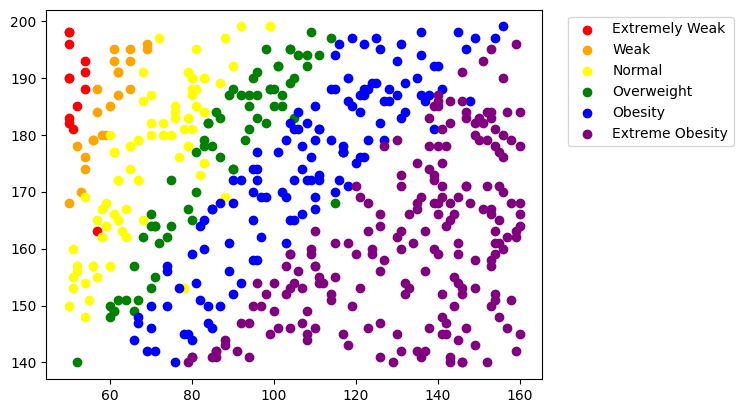

In [35]:
moderator = [
"Extremely Weak",
"Weak",
"Normal",
"Overweight",
"Obesity",
"Extreme Obesity"]

color = ['red','orange','yellow','green','blue','purple']
for i in range(6):
    temp = df[df['Label'] == moderator[i]]
    plt.scatter(temp['Weight'],temp['Height'], color = color[i], label = moderator[i])

plt.legend(loc = 'upper right', bbox_to_anchor = (1.4,1))
plt.show()